In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import numpy as np
from tqdm.notebook import tqdm

In [2]:
from utils.neural_regression import relu

rows_count, col_count = 10000, 1
X, y = make_regression(n_samples=rows_count, n_features=col_count, noise=6, bias=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

y_train = y_train[:, np.newaxis]

In [3]:
from utils.neural_regression import relu

rows_count, col_count = 10000, 1

w_1 = 1.2
w_2 = 2.4
noise_strength = 0.4

X = 8 * np.random.rand(rows_count, 1) - 4

y = w_2 * relu(w_1 * X)
y = y.flatten()

y += np.random.normal(0, noise_strength, size=rows_count)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

y_train = y_train[:, np.newaxis]

In [4]:
from utils.neural_regression import mse, forward, train_neural_regressor_relu

losses, parameters, gradients, current_parameters_1, current_parameters_2 = train_neural_regressor_relu(X_train, y_train, lr=0.045)

Epochs:   0%|          | 0/31 [00:00<?, ?it/s]

Epoch 0, loss: 21.952592
Epoch 1, loss: 21.952467
Epoch 2, loss: 21.952360
Epoch 3, loss: 21.952219
Epoch 4, loss: 21.951987
Epoch 5, loss: 21.951579
Epoch 6, loss: 21.950851
Epoch 7, loss: 21.949544
Epoch 8, loss: 21.947197
Epoch 9, loss: 21.942980
Epoch 10, loss: 21.935402
Epoch 11, loss: 21.921792
Epoch 12, loss: 21.897356
Epoch 13, loss: 21.853517
Epoch 14, loss: 21.774983
Epoch 15, loss: 21.634652
Epoch 16, loss: 21.385046
Epoch 17, loss: 20.944704
Epoch 18, loss: 20.179198
Epoch 19, loss: 18.882725
Epoch 20, loss: 16.785925
Epoch 21, loss: 13.656200
Epoch 22, loss: 9.579654
Epoch 23, loss: 5.325872
Epoch 24, loss: 2.155725
Epoch 25, loss: 0.660551
Epoch 26, loss: 0.243805
Epoch 27, loss: 0.171425
Epoch 28, loss: 0.162189
Epoch 29, loss: 0.161169
Epoch 30, loss: 0.161063


In [5]:
y_pred = forward(X_train, current_parameters_1, current_parameters_2, relu)
print(f'Mean Squared Error: {mse(y_test, y_pred)}')
print(f'Hidden layer: {current_parameters_1[0]}')
print(f'Output layer: {current_parameters_2[0]}')

Mean Squared Error: 23.46661294559074
Hidden layer: [1.69658499]
Output layer: [1.69658453]


In [6]:
parameters = np.array(parameters)
parameters = np.moveaxis(parameters, 1, 2)

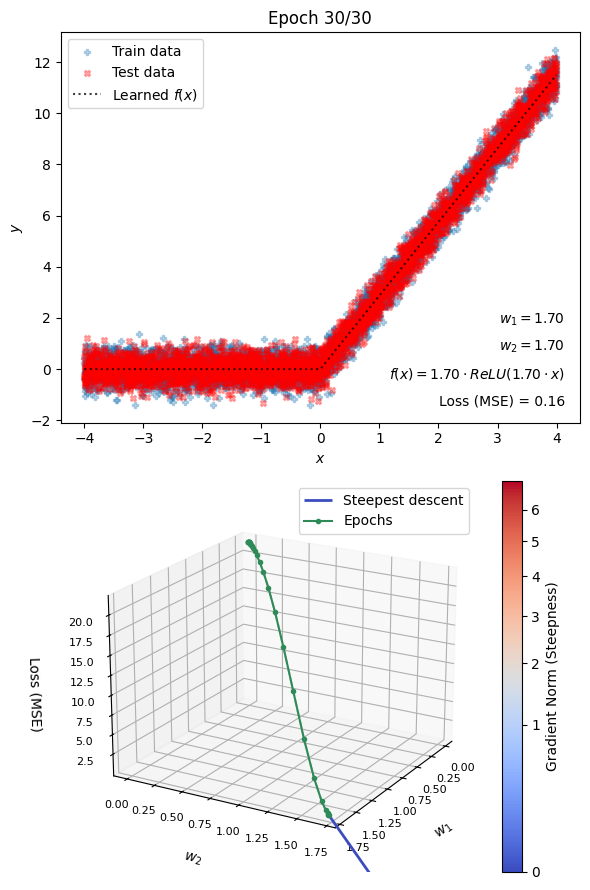

In [7]:
from matplotlib import pyplot as plt
from utils.plot_training import plot_training, plot_3D_loss
from utils.neural_regression import plot_2D_relu_model

fig = plt.figure(figsize=(6, 9))

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, projection='3d')

ax2.view_init(elev=20, azim=30)

def plot_text(epoch_parameters, epoch_loss, text_w1, text_w2, text_fn, text_loss):
    text_w1.set_text(rf'$w_1 = {epoch_parameters[0]:.2f}$')
    text_w2.set_text(rf'$w_2 = {epoch_parameters[1]:.2f}$')
    text_fn.set_text(rf'$f(x) = {epoch_parameters[1]:.2f} \cdot ReLU({epoch_parameters[0]:.2f} \cdot x)$')
    text_loss.set_text(f'Loss (MSE) = {epoch_loss:.2f}')

def plot_other():
    ax1.set_xlabel(r'$x$')
    ax1.set_ylabel(r'$y$')

    ax1.legend(loc='upper left')
    
    ax2.set_xlabel(r'$w_1$', labelpad=10)
    ax2.set_ylabel(r'$w_2$', labelpad=10)
    ax2.set_zlabel('Loss (MSE)', labelpad=10)

    ax2.legend()

frame_buffers = plot_training(fig, ax1, ax2, losses, parameters, gradients, X_train, y_train, X_test, y_test,
    plot_2D_relu_model,
    plot_3D_loss,
    plot_text,
    plot_other
)

In [8]:
from utils.plot_training import save_animation

experiment_name = '2D_neural_regression_relu'
save_animation(frame_buffers, experiment_name)